## Data preparation

In [1]:
categories = ['negative', 'positive']

In [2]:
data = []
target_names = []

with open("./sentiment labelled sentences/amazon_cells_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))

with open("./sentiment labelled sentences/imdb_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))
        
with open("./sentiment labelled sentences/yelp_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))

In [4]:
import pandas as pd
X = pd.DataFrame(data, columns=['text'])
X['category'] = target_names

temp_list = []
for i in target_names:
    temp_list.append(categories[target_names[i]])
X['category_name'] = temp_list
X

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative


## Drop duplicate

In [5]:
X.drop_duplicates(inplace=True)
X.reset_index(drop=True, inplace=True)
X

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2978,I think food should have flavor and texture an...,0,negative
2979,Appetite instantly gone.,0,negative
2980,Overall I was not impressed and would not go b...,0,negative
2981,"The whole experience was underwhelming, and I ...",0,negative


## Generate feature

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
print(X_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [8]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies)

[ 1 36  3 ...  1  2  1]


## _Generate meaningful new data visualizations_

<AxesSubplot:title={'center':'total distribution'}>

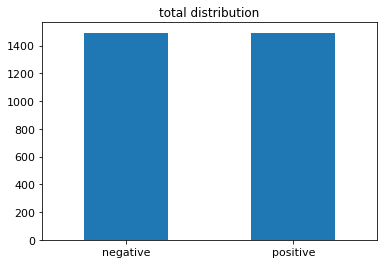

In [10]:
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'total distribution',        
                                    rot = 0, fontsize = 11)